<font color="green">Anggota Kelompok : 
1. Aimmatul
2. Annisa
3. Fairuz 


---

<center><img src="https://a.ipricegroup.com/media/Abigail/Menu_McDonalds_Indonesia.jpg" width="500"/>

#<center><font color="Red">-> Klasifikasi menggunakan data Menu MCD <-

# Challenge 3

##Preprocessing Data

Pada tahap pemrosean data, yang pertama yaitu mengimport library yang dibutuhkan

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import sklearn.metrics as sklearnm

#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline



Selanjutnya menginput data yang digunakan, disini data yang digunakan bernama menu.csv yang berisikan tingkat nutrisi dari setiap menu di MCD

In [ ]:
#memanggil data yang ingin digunakan
dataset = pd.read_csv('menu.csv')
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


setelah data sudah di inputkan, maka dilakukan proses pengecekan terhadap data, apakah terdapat nilai yang kosong atau null

In [ ]:
#mengecek apakah terdapat kata yang kosong
dataset.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Jika tidak terdapat nilai null maka masuk ke tahap selanjutnya yaitu pengecekan type data dari setiap parameter

In [ ]:
#mengecek type data yang digunakan apakah sudah sesuai dengan yang dibutuhkan
dataset.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

Dari hasil pengecekan data, parameter serving size diketahui bertipe data object, padahal yang dibutuhkan parameter serving size adalah type data float.

Oleh karena itu, proses selanjutnya adalah mengubah type data serving size dari object ke float dengan menyamakan nilai yang ada didalamnya dengan satuan gram

In [ ]:
# mengubah tipe data Serving Size dari Object ke float
serving_size_conv = []
for i in dataset['Serving Size']:
    if '(' in i and 'g)' in i:
        serving_size_conv.append(float(i[i.find('(')+1:-3])) 
    elif 'fl oz' in i:
        serving_size_conv.append(float(i[0:i.find(' ')])*29.5735) ## assume 1 fl oz = 29.5735 g
    elif '(' and 'ml)':
        serving_size_conv.append(float(i[i.find('(')+1:-4])*1.04) ## assume 1 ml = 1.04g

dataset['Serving Size']= pd.DataFrame(serving_size_conv).astype('float')
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
dataset.groupby('Category').sum()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Category,,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,2909.00000,7410,3370,373.0,579,157.0,780,16.5,1310,434,15310,637,602,202,38,148,132,410,104,110,345,350
Beverages,14328.32065,3070,20,2.5,4,1.5,8,0.0,15,5,1120,47,778,259,1,2,752,36,20,634,80,8
Breakfast,8448.00000,22120,10455,1163.0,1792,447.5,2244,4.5,6420,2140,50865,2121,2090,696,137,539,347,834,291,374,679,720
Chicken & Fish,6568.00000,14930,6540,728.0,1116,166.5,840,3.5,2035,681,33960,1413,1325,441,79,319,198,786,552,341,417,442
Coffee & Tea,49387.74500,26970,6755,762.0,1174,467.5,2315,13.5,2590,891,13005,544,4230,1412,74,302,3763,842,1020,0,2688,204
Desserts,711.00000,1555,450,51.5,78,30.0,149,0.0,105,34,820,35,244,81,7,24,183,28,36,29,80,28
Salads,1632.00000,1620,650,70.5,110,22.5,111,0.0,310,104,3530,147,130,43,27,111,41,119,880,170,90,62
Smoothies & Shakes,12433.84300,14880,3575,395.5,608,234.5,1170,15.0,1260,412,5140,218,2532,844,41,161,2181,304,525,195,996,111
Snacks & Sides,1403.00000,3195,1230,137.0,211,35.0,174,0.0,240,81,5145,214,379,125,20,92,53,109,63,366,78,86


In [ ]:
#mengubah kategori menjadi angka 1, 2, 3, dst
dataset_replace_category = dataset.replace({'Category' : { 'Beef & Pork' : 1, 'Beverages' : 2, 'Breakfast' : 3, 'Chicken & Fish' : 4, 'Coffee & Tea' : 5, 'Desserts' : 6, 'Salads' : 7, 'Smoothies & Shakes' : 8, 'Snacks & Sides' : 9 }})

In [ ]:
dataset_replace_category

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,3,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,3,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,3,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,3,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,3,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,8,McFlurry with Oreo Cookies (Small),285.0,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,8,McFlurry with Oreo Cookies (Medium),381.0,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,8,McFlurry with Oreo Cookies (Snack),190.0,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,8,McFlurry with Reese's Peanut Butter Cups (Medium),403.0,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [ ]:
dataset_replace_category.dtypes

Category                           int64
Item                              object
Serving Size                     float64
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

##Decision Tree

In [ ]:
#split dataset menjadi features dan category

features = ['Serving Size', 'Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
x = dataset_replace_category[features]
y = dataset_replace_category.Category

In [ ]:
#split dataset menjadi training set dan dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#membuat decision tree classifier

clf = DecisionTreeClassifier()

#train decision tree classifier

clf = clf.fit(x_train,y_train)

#predict respon untuk test

y_pred = clf.predict(x_test)

In [ ]:
#evaluasi model

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6794871794871795


In [ ]:
#visualisasi decision tree

!pip install graphviz
!pip install pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


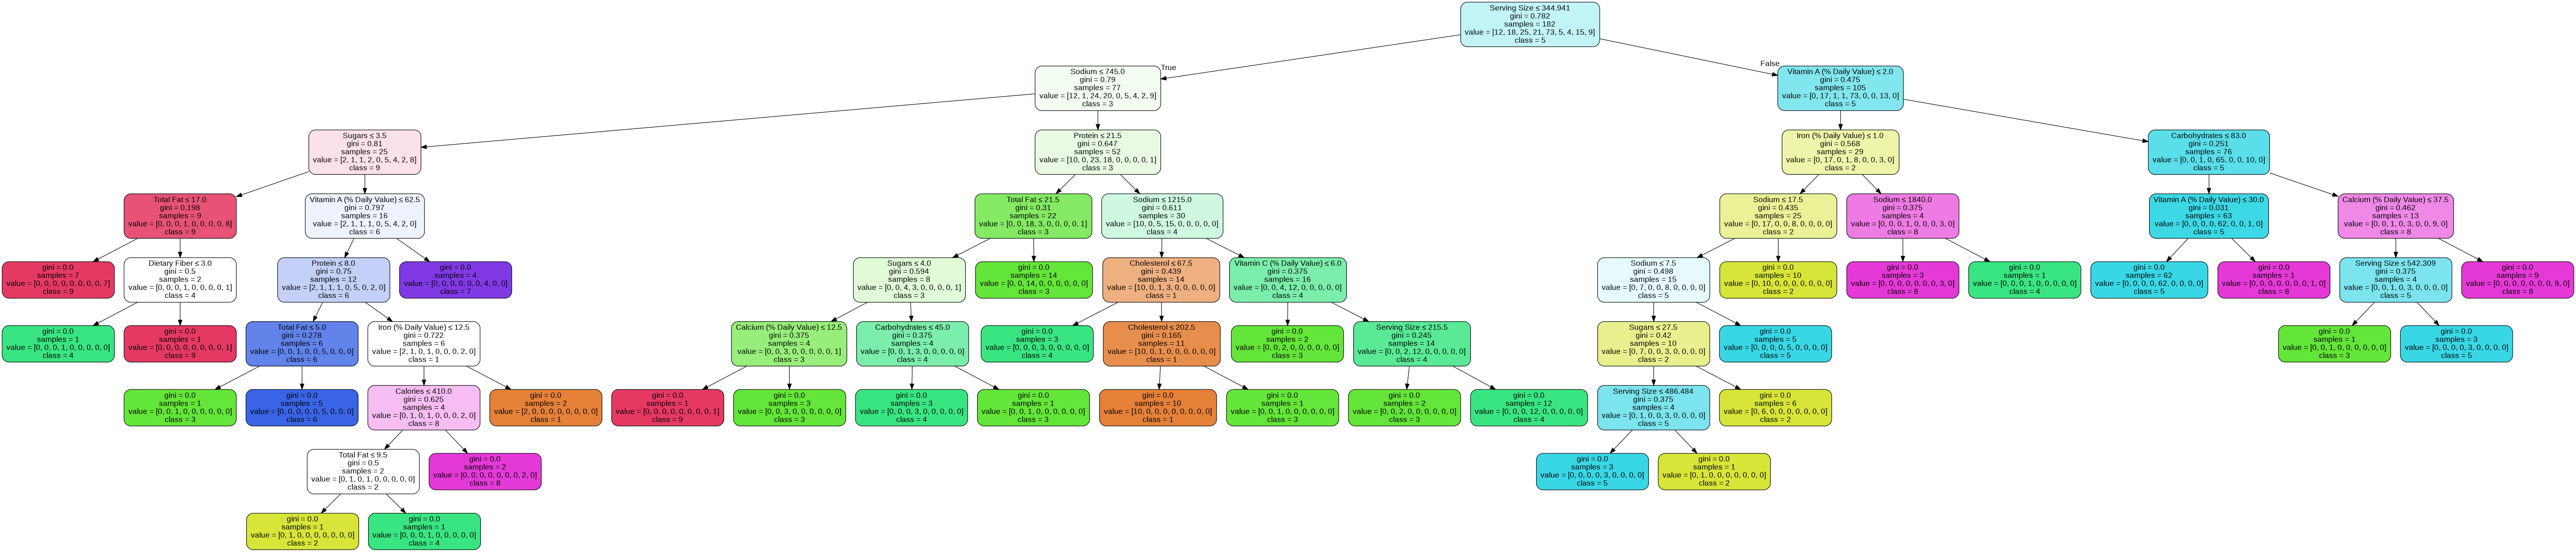

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('McD_nutrition.png')
Image(graph.create_png())


## KNN


In [ ]:
#Klasifikasi KNN


In [ ]:
datasetkkn=dataset.iloc[:,lambda dataset:[0,3,4,5,7,9,10,12,14,16,18,19]]
datasetkkn

,Category,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,Breakfast,300,120,13.0,5.0,0.0,260,750,31,4,3,17
1,Breakfast,250,70,8.0,3.0,0.0,25,770,30,4,3,18
2,Breakfast,370,200,23.0,8.0,0.0,45,780,29,4,2,14
3,Breakfast,450,250,28.0,10.0,0.0,285,860,30,4,2,21
4,Breakfast,400,210,23.0,8.0,0.0,50,880,30,4,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,510,150,17.0,9.0,0.5,45,280,80,1,64,12
256,Smoothies & Shakes,690,200,23.0,12.0,1.0,55,380,106,1,85,15
257,Smoothies & Shakes,340,100,11.0,6.0,0.0,30,190,53,1,43,8
258,Smoothies & Shakes,810,290,32.0,15.0,1.0,60,400,114,2,103,21


In [ ]:
#xnorm = datasetkkn.iloc[:, 1::].values #data
#x= (xnorm-xnorm.min())/(xnorm.max()-xnorm.min())
x = datasetkkn.iloc[:, 1::].values #data
y = datasetkkn.iloc[:, :1].values #label


In [ ]:
#x
#y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30) #data tesnya 20%, data train 80&

In [ ]:
cekdata=pd.DataFrame(X_test,columns=['Calories','Calories from Fat','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein'])
#cekdata.index(['Calories','Calories from Fat','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein'])
cekdata["category-asli"] = y_test
#cekdata

In [ ]:
#print('xtrain',X_train)
#print('xtest',X_test)
#print('ytrain',y_train)
#print('ytest',y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.717948717948718

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

       Beef & Pork       1.00      0.80      0.89         5
         Beverages       0.55      0.86      0.67         7
         Breakfast       0.82      0.88      0.85        16
    Chicken & Fish       0.75      0.75      0.75         8
      Coffee & Tea       0.73      0.81      0.77        27
          Desserts       0.00      0.00      0.00         2
            Salads       0.00      0.00      0.00         2
Smoothies & Shakes       1.00      0.44      0.62         9
    Snacks & Sides       0.00      0.00      0.00         2

          accuracy                           0.72        78
         macro avg       0.54      0.50      0.50        78
      weighted avg       0.73      0.72      0.71        78



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cekdata["category-pred"] = y_pred

In [ ]:
cekdata
#melihat karakteristik

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,category-asli,category-pred
0,260.0,40.0,4.0,1.5,0.0,5.0,115.0,49.0,5.0,18.0,5.0,Breakfast,Breakfast
1,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,Beverages,Beverages
2,460.0,170.0,19.0,9.0,0.0,15.0,370.0,66.0,3.0,32.0,6.0,Breakfast,Coffee & Tea
3,530.0,240.0,27.0,10.0,1.0,85.0,960.0,47.0,3.0,9.0,24.0,Beef & Pork,Beef & Pork
4,360.0,140.0,16.0,3.0,0.0,35.0,800.0,40.0,2.0,5.0,14.0,Chicken & Fish,Snacks & Sides
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,180.0,0.0,0.0,0.0,0.0,0.0,10.0,45.0,0.0,45.0,1.0,Coffee & Tea,Beverages
74,720.0,360.0,40.0,15.0,1.5,115.0,1470.0,51.0,4.0,14.0,39.0,Beef & Pork,Beef & Pork
75,520.0,270.0,30.0,14.0,0.0,250.0,1410.0,43.0,3.0,4.0,19.0,Breakfast,Breakfast
76,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,2.0,Beverages,Beverages


In [ ]:
#dataset.groupby('Category').mean()

In [ ]:
diagram=dataset.groupby('Category').mean()
#diagram

In [ ]:
diagramklas=diagram.iloc[:,lambda diagram:[1,2,3,5,7,8,10,12,14,16,17]]
diagramklas
diagramklast=diagramklas.transpose()

(-100.0, 1800.0)

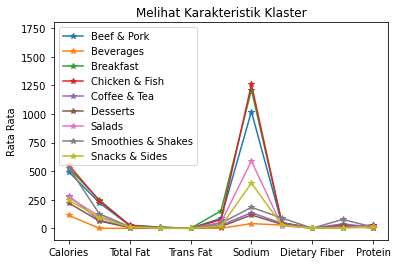

In [ ]:
diagramklast.plot(kind='line',marker="*")
#plt.plot(plotsize=(15,15))
plt.title('Melihat Karakteristik Klaster')
plt.ylabel('Rata Rata')
plt.legend()
plt.ylim(-100,1800)


In [ ]:
diagramklas2=(diagramklas-diagramklas.min())/(diagramklas.max()-diagramklas.min())
diagramklast2=diagramklas2.transpose()


(-0.1, 1.1)

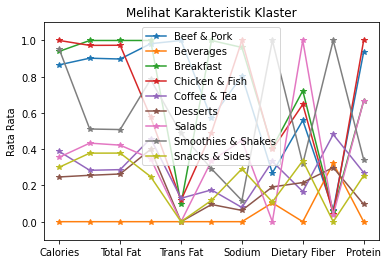

In [ ]:
#plt.figure(figsize=(15,15))
diagramklast2.plot(kind='line',marker="*")
plt.plot(plotsize=(15,15))
plt.title('Melihat Karakteristik Klaster')
plt.ylabel('Rata Rata')
plt.legend()
plt.ylim(-0.1,1.1)
#plt.hist(gini_rasio,bins=35,color='grey')

In [ ]:
cekdata

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,category-asli,category-pred
0,260.0,40.0,4.0,1.5,0.0,5.0,115.0,49.0,5.0,18.0,5.0,Breakfast,Breakfast
1,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,Beverages,Beverages
2,460.0,170.0,19.0,9.0,0.0,15.0,370.0,66.0,3.0,32.0,6.0,Breakfast,Coffee & Tea
3,530.0,240.0,27.0,10.0,1.0,85.0,960.0,47.0,3.0,9.0,24.0,Beef & Pork,Beef & Pork
4,360.0,140.0,16.0,3.0,0.0,35.0,800.0,40.0,2.0,5.0,14.0,Chicken & Fish,Snacks & Sides
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,180.0,0.0,0.0,0.0,0.0,0.0,10.0,45.0,0.0,45.0,1.0,Coffee & Tea,Beverages
74,720.0,360.0,40.0,15.0,1.5,115.0,1470.0,51.0,4.0,14.0,39.0,Beef & Pork,Beef & Pork
75,520.0,270.0,30.0,14.0,0.0,250.0,1410.0,43.0,3.0,4.0,19.0,Breakfast,Breakfast
76,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,2.0,Beverages,Beverages


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Text(0, 0.5, 'Mean Error')

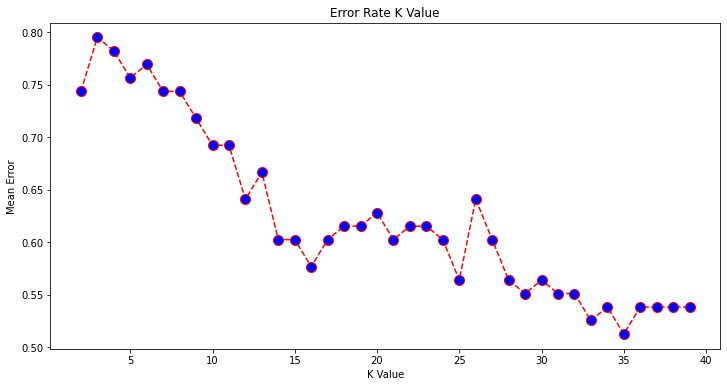

In [ ]:
error = []

# Calculating error for K values between 2 and 40
for i in range(2, 40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')